In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from desiutil.plots import init_sky, plot_healpix_map, plot_grid_map, plot_sky_circles, plot_sky_binned, prepare_data

In [3]:
import mpl_toolkits

/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


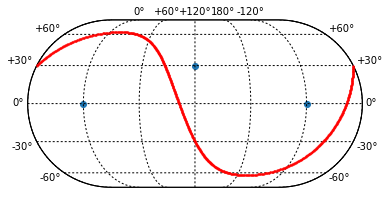

In [4]:
basemap = init_sky()
basemap.scatter([0, 120, 240], [0, 30, 0], latlon=True);

/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


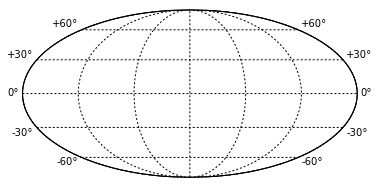

In [5]:
init_sky(projection='moll', ra_center=0, galactic_plane_color=None);


/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:

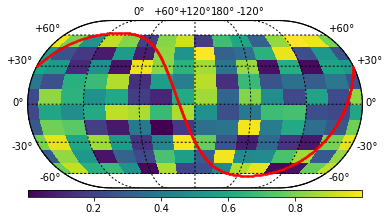

In [6]:
n_ra, n_dec = 15, 10
ra_edges = np.linspace(0., 360., n_ra + 1)
dec_edges = np.linspace(-60., 60., n_dec + 1)
data = np.random.uniform(size=(n_dec, n_ra))
plot_grid_map(data, ra_edges, dec_edges);

/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


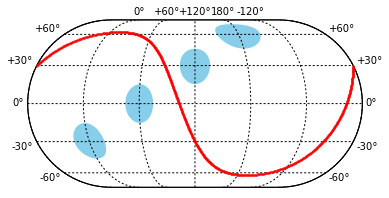

In [7]:
plot_sky_circles(ra_center=[0, 60, 120, 180], dec_center=[-30, 0, 30, 60],
                 field_of_view=30);

/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


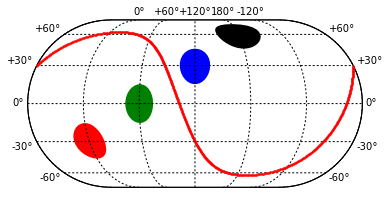

In [8]:
plot_sky_circles(ra_center=[0, 60, 120, 180], dec_center=[-30, 0, 30, 60],
                 field_of_view=30, facecolors=['r', 'g', 'b', 'k']);

In [ ]:
from desitarget.targetmask import desi_mask
import fitsio
import numpy as np

In [63]:
dd = fitsio.read('targets-dr3.1-0.8.1.fits', ext=1, columns=['RA','DEC','DESI_TARGET']) #rows=np.arange(numsources),

(7.128885571705747, -3.8743157198911993, 1152921504606846976)


/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


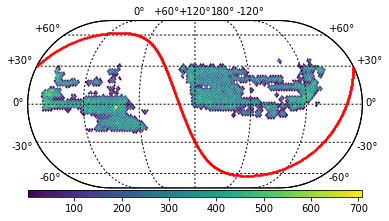

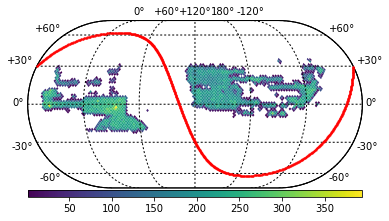

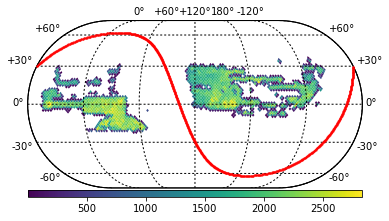

In [91]:
for obj in ('LRG', 'QSO', 'ELG'):
    cut = np.where((dd['DESI_TARGET'] & desi_mask.mask(obj)) != 0)*1
    plt.figure()
    plot_sky_binned(dd['RA'][cut], dd['DEC'][cut], verbose=False, clip_lo='!1', plot_type='healpix');